# **Projeto: Previsão de Intenção de Compra de Clientes em Loja Web**

**Descrição do Projeto**

Neste projeto, nosso objetivo é criar um sistema inteligente para antecipar a intenção de compra dos clientes em um site de e-commerce. Imagine poder prever quais clientes têm maior probabilidade de realizar compras online, com base em suas características e comportamentos passados. Essa capacidade de prever a intenção de compra não só aprimorará a experiência do cliente, mas também permitirá que a empresa direcione seus esforços de marketing de forma mais eficaz.

**Objetivo**

Queremos desenvolver um modelo preditivo capaz de analisar os padrões de comportamento dos clientes e identificar sinais que indicam a propensão deles para realizar compras no site da empresa. Para isso, vamos usar uma base de dados que contém informações detalhadas sobre os clientes, incluindo:

Dados demográficos (idade, renda, etc.)

Informações sobre compras anteriores



# Base de dados:

Year_Birth: Ano de nascimento do cliente.

Education: Nível de escolaridade do cliente.

Marital_Status: Estado civil do cliente.

Income: Renda anual da família do cliente.

Kidhome: Número de crianças na casa do cliente.

Recency: Número de dias desde a última compra do cliente.

Complain: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário.

MntWines: Valor gasto em vinhos nos últimos 2 anos.

MntFruits: Valor gasto em frutas nos últimos 2 anos.

MntMeatProducts: Valor gasto em carnes nos últimos 2 anos.

MntFishProducts: Valor gasto em peixes nos últimos 2 anos.

MntSweetProducts: Valor gasto em doces nos últimos 2 anos.

MntGoldProds: Valor gasto em produtos de ouro nos últimos 2 anos.

NumDealsPurchases: Número de compras feitas com desconto

NumStorePurchases: Número de compras feitas diretamente nas lojas.

NumWebVisitsMonth: Número de visitas ao site da empresa no último mês.






**WebPurchases: Número de compras feitas pelo site da empresa.(Target)**

# ETAPA 1:

**Preparação dos Dados**

**Exploração e Limpeza:** Analisar e limpar os dados para garantir que estejam prontos para a modelagem.

**Análise:** Construa uma storytelling com gráficos, analisando e retirando insights das informações.

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [57]:
base = pd.read_csv('marketing_campaign.csv', delimiter=';')

In [95]:
base

,Year_Birth,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,58138.0,0,58,635,88,546,172,88,88,...,1,0,0,0,0,0,1,0,0,0
1,1954,46344.0,1,38,11,1,6,2,1,6,...,1,0,0,0,0,0,1,0,0,0
2,1965,71613.0,0,26,426,49,127,111,21,42,...,1,0,0,0,0,0,0,1,0,0
3,1984,26646.0,1,26,11,4,20,10,3,5,...,1,0,0,0,0,0,0,1,0,0
4,1981,58293.0,1,94,173,43,118,46,27,15,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,1967,61223.0,0,46,709,43,182,42,118,247,...,1,0,0,0,0,1,0,0,0,0
2232,1946,64014.0,2,56,406,0,30,0,0,8,...,0,0,1,0,0,0,0,1,0,0
2233,1981,56981.0,0,91,908,48,217,32,12,24,...,1,0,0,0,1,0,0,0,0,0
2234,1956,69245.0,0,8,428,30,214,80,30,61,...,0,1,0,0,0,0,0,1,0,0


In [59]:
# Verificação da tipagem dos dados
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year_Birth         2240 non-null   int64  
 1   Education          2240 non-null   object 
 2   Marital_Status     2240 non-null   object 
 3   Income             2216 non-null   float64
 4   Kidhome            2240 non-null   int64  
 5   Recency            2240 non-null   int64  
 6   MntWines           2240 non-null   int64  
 7   MntFruits          2240 non-null   int64  
 8   MntMeatProducts    2240 non-null   int64  
 9   MntFishProducts    2240 non-null   int64  
 10  MntSweetProducts   2240 non-null   int64  
 11  MntGoldProds       2240 non-null   int64  
 12  NumStorePurchases  2240 non-null   int64  
 13  NumWebVisitsMonth  2240 non-null   int64  
 14  Complain           2240 non-null   int64  
 15  WebPurchases       2240 non-null   int64  
dtypes: float64(1), int64(13)

In [60]:
# Verificação dos daddos da base
base.describe(include='all')

,Year_Birth,Education,Marital_Status,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases
count,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
unique,NaN,5,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Graduation,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1127,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1968.805804,NaN,NaN,52247.251354,0.444196,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,5.790179,5.316518,0.009375,0.503571
std,11.984069,NaN,NaN,25173.076661,0.538398,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,3.250958,2.426645,0.096391,0.500099
min,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,NaN,NaN,35303.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,3.000000,3.000000,0.000000,0.000000
50%,1970.000000,NaN,NaN,51381.500000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,5.000000,6.000000,0.000000,1.000000
75%,1977.000000,NaN,NaN,68522.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,8.000000,7.000000,0.000000,1.000000


Usando o Describe para ver a situação das variaveis da base podemos verificar:
* Outlers na variavel Income que pode ser um erro de digitação.
* Outters na variavel Year_Birth com minimo de 1893 isso pode ser um valor de data minima registrada no sistema, pois clientes nascidos dessa data deveriam estar desativados ou não deveriam constar nesse base.

In [61]:
# verificação de valores vaziu ou nulo
total_nulos = base.isnull().sum().sum()
total_vazios = (base == '').sum().sum()

print(f"Total de valores nulos: {total_nulos}")
print(f"Total de campos vazios: {total_vazios}")

Total de valores nulos: 24
Total de campos vazios: 0


In [62]:
base.isnull().sum()

,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0


Verificado que Income apreseta 24 registros nulo, assim o proximo passo e ajustar com a media da base esses 24 registos

In [63]:
# Calcula a media da coluna Income
mediana_Income = base['Income'].median()

In [64]:
# Filnna substitui os valores nulo pela mediana, e inplaca=True modifica o arquivo
base['Income'].fillna(mediana_Income, inplace=True)

# o erro FutureWarning apresenta por conta da nova versão 3.0 futura não vai ser possivel usar o inplace

/tmp/ipython-input-4163737913.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  base['Income'].fillna(mediana_Income, inplace=True)


In [65]:
base.isnull().sum()

,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0


Dados sem nulos e vazio.

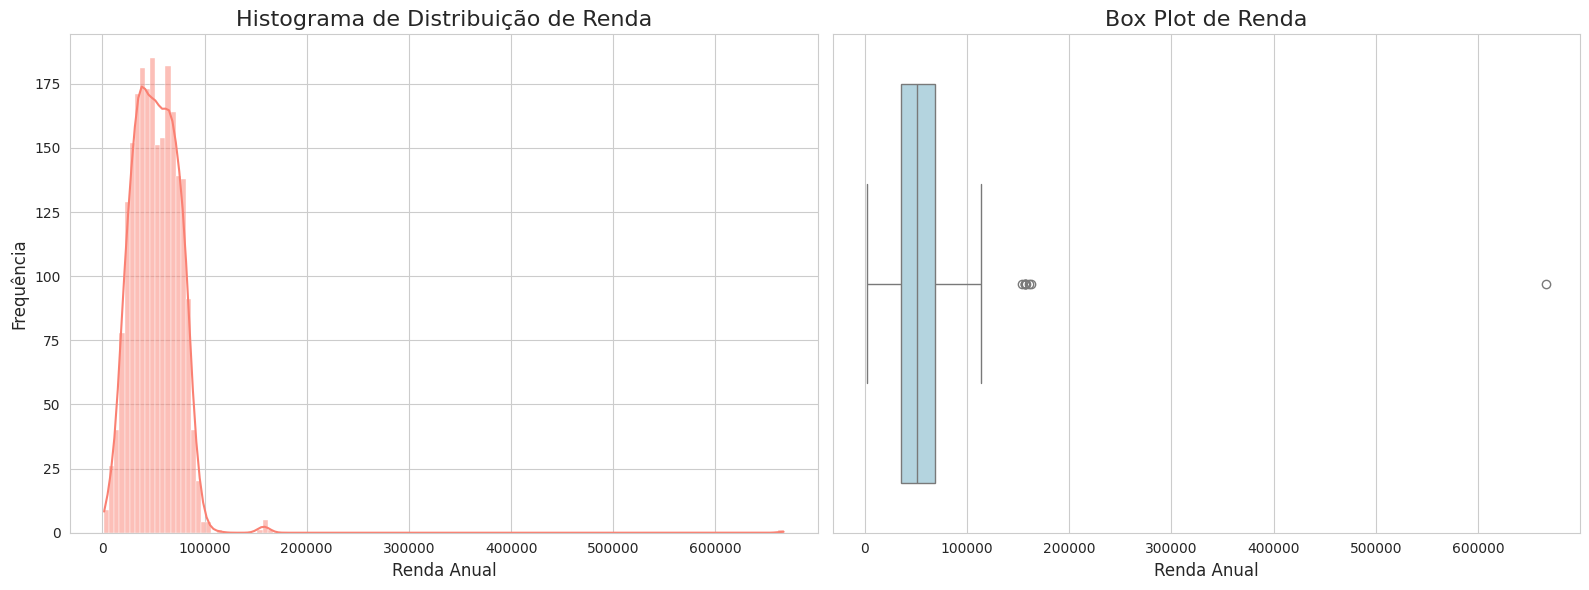

In [66]:
# --- Geração dos Gráficos para 'Income' ---

# Definir o estilo
sns.set_style("whitegrid")

# Criar uma figura com dois subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Histograma
sns.histplot(base['Income'], kde=True, ax=axes[0], color='salmon')
axes[0].set_title('Histograma de Distribuição de Renda', fontsize=16)
axes[0].set_xlabel('Renda Anual', fontsize=12)
axes[0].set_ylabel('Frequência', fontsize=12)

# Gráfico 2: Box Plot
sns.boxplot(x=base['Income'], ax=axes[1], color='lightblue')
axes[1].set_title('Box Plot de Renda', fontsize=16)
axes[1].set_xlabel('Renda Anual', fontsize=12)

plt.tight_layout()
plt.show()


Usando o grafico de Histograma e bloxplot podemso um outleirs e unico acima de de 600k anual, que foi constado acima no discribre.

In [67]:
# retirando o outlier
base = base[base['Income'] < 200000].reset_index(drop=True)

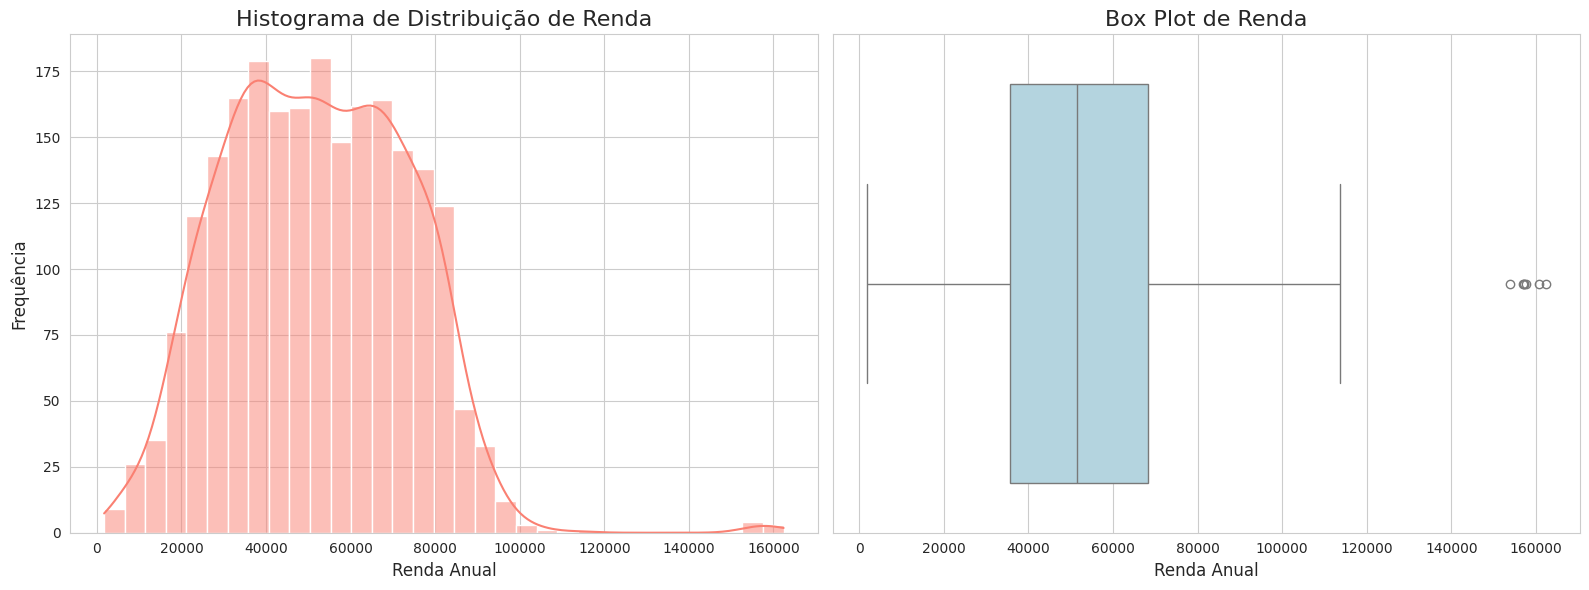

In [68]:
# --- Geração dos Gráficos para 'Income' ---

# Definir o estilo
sns.set_style("whitegrid")

# Criar uma figura com dois subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Histograma
sns.histplot(base['Income'], kde=True, ax=axes[0], color='salmon')
axes[0].set_title('Histograma de Distribuição de Renda', fontsize=16)
axes[0].set_xlabel('Renda Anual', fontsize=12)
axes[0].set_ylabel('Frequência', fontsize=12)

# Gráfico 2: Box Plot
sns.boxplot(x=base['Income'], ax=axes[1], color='lightblue')
axes[1].set_title('Box Plot de Renda', fontsize=16)
axes[1].set_xlabel('Renda Anual', fontsize=12)

plt.tight_layout()
plt.show()

Agora podemos verificar os dados sem os outlier, ainda apresenta algums dados acima de 140k mas isso pode ser dados reais.

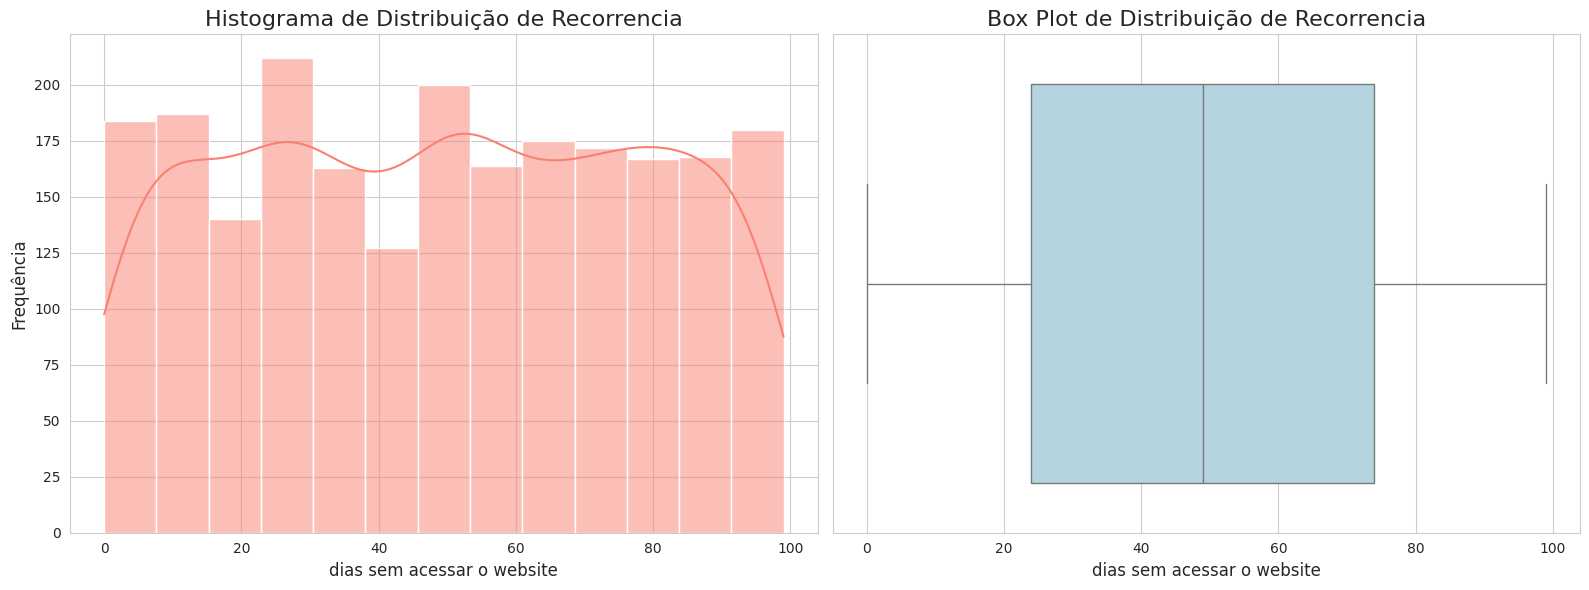

In [69]:
# --- Geração dos Gráficos para 'Recency' ---

# Definir o estilo
sns.set_style("whitegrid")

# Criar uma figura com dois subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Histograma
sns.histplot(base['Recency'], kde=True, ax=axes[0], color='salmon')
axes[0].set_title('Histograma de Distribuição de Recorrencia', fontsize=16)
axes[0].set_xlabel('dias sem acessar o website', fontsize=12)
axes[0].set_ylabel('Frequência', fontsize=12)

# Gráfico 2: Box Plot
sns.boxplot(x=base['Recency'], ax=axes[1], color='lightblue')
axes[1].set_title('Box Plot de Distribuição de Recorrencia', fontsize=16)
axes[1].set_xlabel('dias sem acessar o website', fontsize=12)

plt.tight_layout()
plt.show()

A recorrencia nos apresenta que o numero maximo de dias sem acessar o site vai de 0 a 100 dias, mas os picos marios de não acesso vai entre 23 a 43 dias, assim podemos ver que os uma boa dos cliente ficam sem acessar o website entre os 20 a 50 dias sem acessar o website

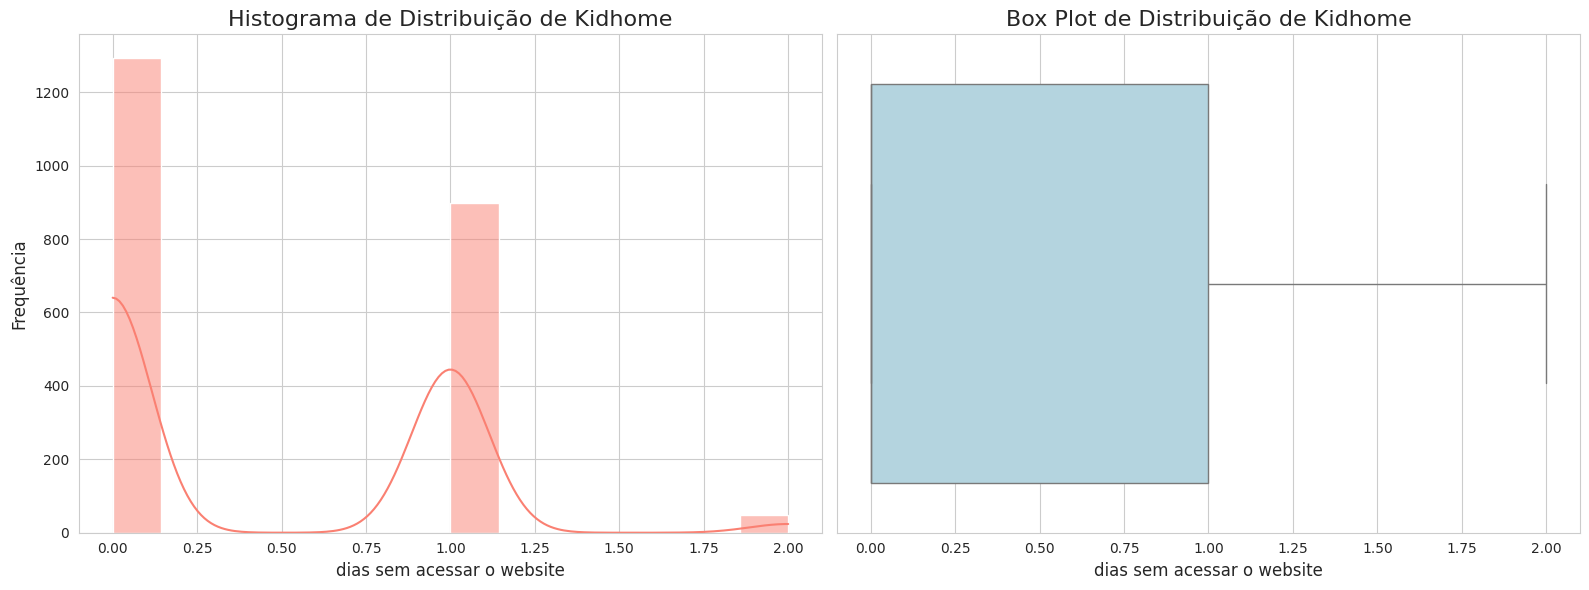

In [70]:
# --- Geração dos Gráficos para 'Kidhome' ---

# Definir o estilo
sns.set_style("whitegrid")

# Criar uma figura com dois subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Histograma
sns.histplot(base['Kidhome'], kde=True, ax=axes[0], color='salmon')
axes[0].set_title('Histograma de Distribuição de Kidhome', fontsize=16)
axes[0].set_xlabel('dias sem acessar o website', fontsize=12)
axes[0].set_ylabel('Frequência', fontsize=12)

# Gráfico 2: Box Plot
sns.boxplot(x=base['Kidhome'], ax=axes[1], color='lightblue')
axes[1].set_title('Box Plot de Distribuição de Kidhome', fontsize=16)
axes[1].set_xlabel('dias sem acessar o website', fontsize=12)

plt.tight_layout()
plt.show()

Podemos verificar com esses dois graficos que a base dos cliente apresentam que não tem filhos e pouco apresenta uma quantidade de dois filhos.

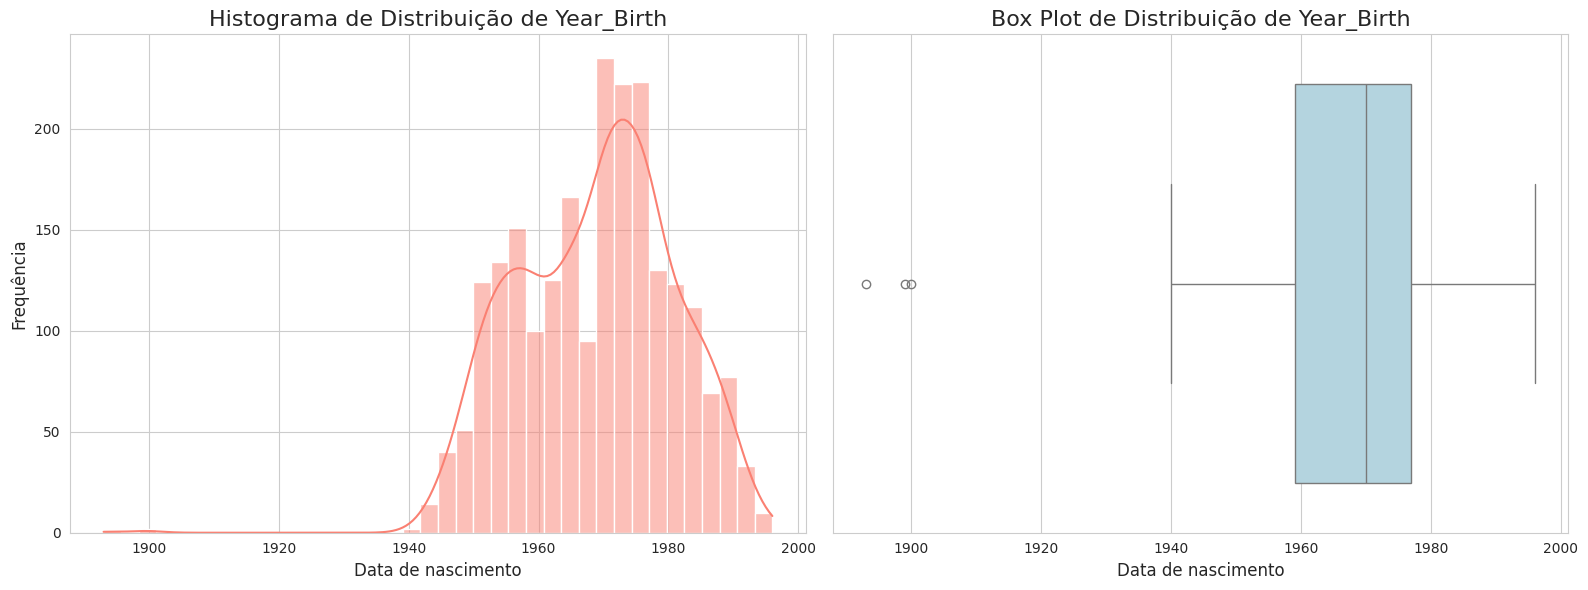

In [71]:
# --- Geração dos Gráficos para 'Year_Birth' ---

# Definir o estilo
sns.set_style("whitegrid")

# Criar uma figura com dois subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Histograma
sns.histplot(base['Year_Birth'], kde=True, ax=axes[0], color='salmon')
axes[0].set_title('Histograma de Distribuição de Year_Birth', fontsize=16)
axes[0].set_xlabel('Data de nascimento', fontsize=12)
axes[0].set_ylabel('Frequência', fontsize=12)

# Gráfico 2: Box Plot
sns.boxplot(x=base['Year_Birth'], ax=axes[1], color='lightblue')
axes[1].set_title('Box Plot de Distribuição de Year_Birth', fontsize=16)
axes[1].set_xlabel('Data de nascimento', fontsize=12)

plt.tight_layout()
plt.show()

Podemos ver o outlers que vericamos no describe clientes nascidos antes dos anos 1920.

In [72]:
base = base[base['Year_Birth'] > 1920].reset_index(drop=True)

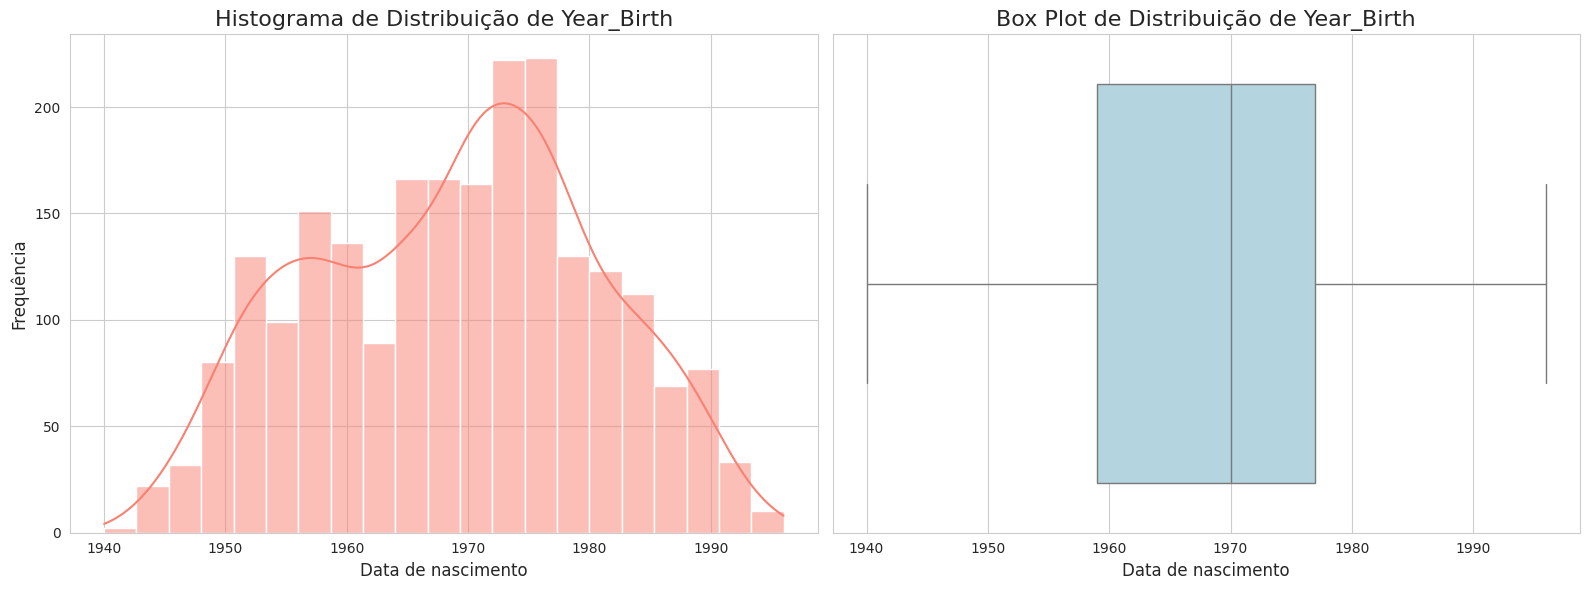

In [73]:
# --- Geração dos Gráficos para 'Year_Birth' ---

# Definir o estilo
sns.set_style("whitegrid")

# Criar uma figura com dois subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Histograma
sns.histplot(base['Year_Birth'], kde=True, ax=axes[0], color='salmon')
axes[0].set_title('Histograma de Distribuição de Year_Birth', fontsize=16)
axes[0].set_xlabel('Data de nascimento', fontsize=12)
axes[0].set_ylabel('Frequência', fontsize=12)

# Gráfico 2: Box Plot
sns.boxplot(x=base['Year_Birth'], ax=axes[1], color='lightblue')
axes[1].set_title('Box Plot de Distribuição de Year_Birth', fontsize=16)
axes[1].set_xlabel('Data de nascimento', fontsize=12)

plt.tight_layout()
plt.show()

Agora podemos verificar a Year_Birth com valor correto

# ETAPA 2:
**Pré-processamento**

**Análise Correlação:** Verifique a correlação entre as váriaveis e análise se há espaço para retirar váriaveis que não te parecem importantes.

**Codificação de Variáveis Categóricas:** Transformar variáveis categóricas em um formato que os modelos de machine learning possam interpretar.


**Separe a base em Y, X e Treino e teste:**: Faça a separação da base.

**Realize a padronização dos dados**: Padronize os dados para garantir eficiência no modelo e eficácia.








In [74]:
# Transformação usando OneHot
base['Education'] = base['Education'].astype(str)
base['Marital_Status'] = base['Marital_Status'].astype(str)

base = pd.get_dummies(base, columns=['Education', 'Marital_Status'], drop_first=True)

# Alteração de true e false para para 0 e 1 para melhor entendimento do modelo.
base = base.replace({True: 1, False: 0})

/tmp/ipython-input-1819143847.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base = base.replace({True: 1, False: 0})


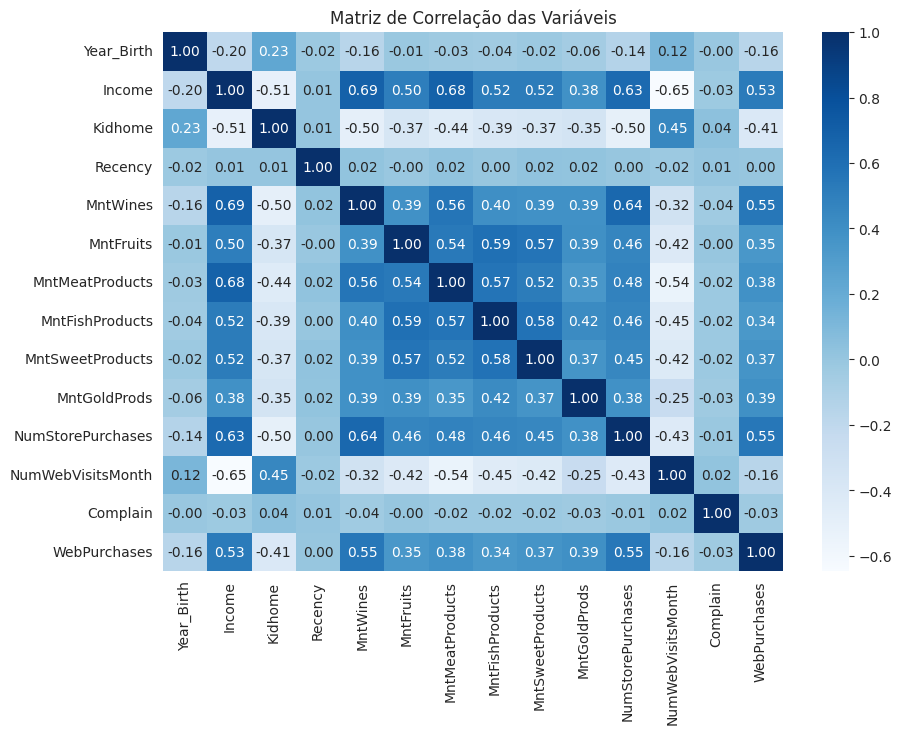

In [75]:
# Variaveis padrões
cols = [
    'Year_Birth',
    'Income',
    'Kidhome',
    'Recency',
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds',
    'NumStorePurchases',
    'NumWebVisitsMonth',
    'Complain',
    'WebPurchases'

]

df_corr = base[cols].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(df_corr, annot=True, cmap='Blues', fmt=".2f")
plt.title("Matriz de Correlação das Variáveis")
plt.show()

Verificados que as variaveis Income, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumStorePurchases apresenta uma boa relação com WebPurchases

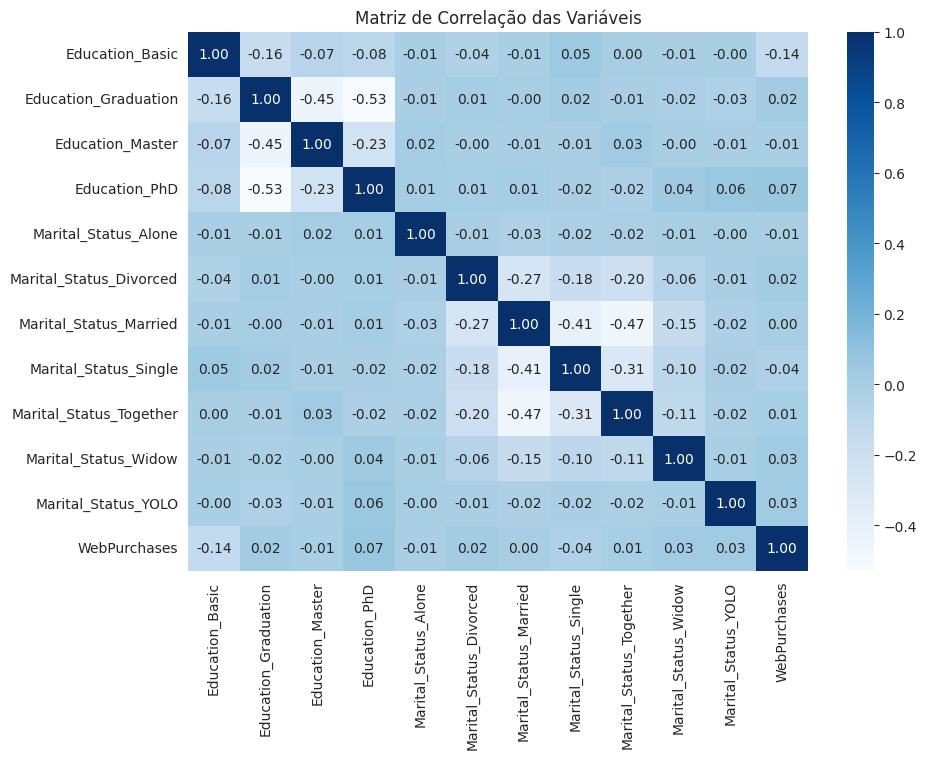

In [76]:
# Variaveis novas tranformadas pelo OneHot
cols = [
    'Education_Basic',
    'Education_Graduation',
    'Education_Master',
    'Education_PhD',
    'Marital_Status_Alone',
    'Marital_Status_Divorced',
    'Marital_Status_Married',
    'Marital_Status_Single',
    'Marital_Status_Together',
    'Marital_Status_Widow',
    'Marital_Status_YOLO',
    'WebPurchases'

]

df_corr = base[cols].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(df_corr, annot=True, cmap='Blues', fmt=".2f")
plt.title("Matriz de Correlação das Variáveis")
plt.show()

As variaveis novas não mostra relação com o WebPurchases

In [93]:
# Inicio da normalização dos dados para separação do modelo.
# Retirando dados que não são fortes relacionadas
scaler = StandardScaler()

X_numericas = base[['Income','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumStorePurchases']]

X_scaled = scaler.fit_transform(X_numericas)

# Transformando em DataFrame com colunas nomeadas
X_scaled = pd.DataFrame(X_scaled, columns=X_numericas.columns, index=base.index)

In [96]:
X_scaled

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases
0,0.288947,0.983228,1.554170,1.679746,2.461068,1.475396,0.845669,-0.552429
1,-0.262003,-0.871064,-0.636431,-0.713455,-0.650414,-0.631638,-0.729742,-1.167738
2,0.918423,0.362159,0.572177,-0.177201,1.344595,-0.147262,-0.038098,1.293496
3,-1.182183,-0.871064,-0.560893,-0.651409,-0.503991,-0.583200,-0.748954,-0.552429
4,0.296187,-0.389661,0.421101,-0.217088,0.154911,-0.001950,-0.556831,0.062879
...,...,...,...,...,...,...,...,...
2231,0.433060,1.203128,0.421101,0.066551,0.081700,2.201960,3.900428,-0.552429
2232,0.563440,0.302727,-0.661610,-0.607091,-0.687019,-0.655857,-0.691317,-0.244775
2233,0.234898,1.794481,0.546997,0.221666,-0.101329,-0.365231,-0.383920,2.216459
2234,0.807803,0.368102,0.093769,0.208371,0.777208,0.070707,0.326936,1.293496


In [97]:
# separando a base para treino e teste
X = X_scaled
y = base['WebPurchases']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# ETAPA 3:

**Modelagem**

Escolha ao menos 2 técnicas de machine learning e rode 2 modelos, afim de identificar qual tem o melhor resultado para essa base. Lembrando que estamos lidando com uma classificação binária.

In [107]:
log_model = LogisticRegression(max_iter=1000)

log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

# Teste do modelo.
print("ACURÁCIA (Logistic Regression):", accuracy_score(y_test, y_pred_log))
print("\nMATRIZ DE CONFUSÃO:\n", confusion_matrix(y_test, y_pred_log))
print("\nRELATÓRIO DE CLASSIFICAÇÃO:\n", classification_report(y_test, y_pred_log))

ACURÁCIA (Logistic Regression): 0.8443649373881932

MATRIZ DE CONFUSÃO:
 [[241  36]
 [ 51 231]]

RELATÓRIO DE CLASSIFICAÇÃO:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       277
           1       0.87      0.82      0.84       282

    accuracy                           0.84       559
   macro avg       0.85      0.84      0.84       559
weighted avg       0.85      0.84      0.84       559



In [106]:


rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Teste do modelo.
print("ACURÁCIA (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("\nMATRIZ DE CONFUSÃO:\n", confusion_matrix(y_test, y_pred_rf))
print("\nRELATÓRIO DE CLASSIFICAÇÃO:\n", classification_report(y_test, y_pred_rf))

ACURÁCIA (Random Forest): 0.9141323792486583

MATRIZ DE CONFUSÃO:
 [[238  39]
 [  9 273]]

RELATÓRIO DE CLASSIFICAÇÃO:
               precision    recall  f1-score   support

           0       0.96      0.86      0.91       277
           1       0.88      0.97      0.92       282

    accuracy                           0.91       559
   macro avg       0.92      0.91      0.91       559
weighted avg       0.92      0.91      0.91       559



# ETAPA 4:

**Avaliação**

Avalie os resultados encontrados nos dois modelos e identifique qual te pareceu realizar melhor as previsões.

Utilize além das métricas padrões a matriz de confusão.

O que se performou melhor foi o random forest alem da matriz de confusão para prever o modulo 1 quanto nas Accuracy, Recall e F1-score para modulo 1.